# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import yaml

# Lecture du fichier data_cleaned_final_sans_dummies.csv

### Lecture du fichier de conf

In [2]:
file = open('../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)

# Définition d'une fonction pointant vers le répertoire des données
def datapath(fich):
    return conf['data_path'] + fich

# Lecture des données

In [3]:
# Lecture des données
fich = conf['local_data_path'] + 'data_cleaned_final_sans_dummies.csv'
df = pd.read_csv(fich, index_col=0,low_memory=False)
df.head()

,jour,mois,an,lum,dep,agg,int,atm,col,lat,...,eq_ceinture,eq_casque,eq_siege,eq_gilet,eq_airbag,eq_gants,eq_indetermine,eq_autre,jour_chome,prox_pt_choc
0,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,0
1,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,0
2,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,1
3,30,11,2019,2.0,93,0,0.0,0.0,6.0,48.930700,...,1,0,0,0,0,0,0,0,1,1
4,28,11,2019,0.0,92,0,0.0,0.0,4.0,48.935872,...,1,0,0,0,0,0,0,0,1,1


# Géolocalisation des accidents

### Métropole

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


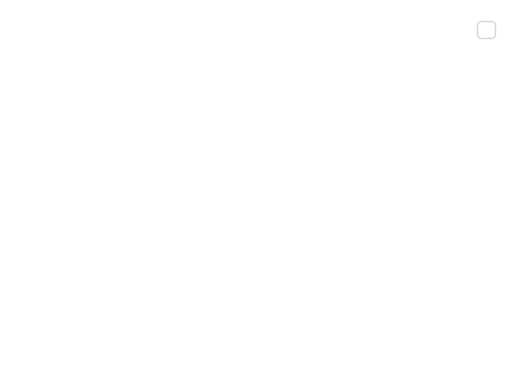

In [7]:
import geopandas as gpd
from shapely.geometry import Point

# Sélectionner les accidents dans les départements dont le code est inférieur à 900
df['dep'] = df['dep'].replace(['2A', '2B'], ['02', '02'])
def_m = df[df['dep'].astype('int') < 900]

# Créer une géométrie Point pour chaque paire de coordonnées (longitude, latitude)
geometry = [Point(xy) for xy in zip(def_m['long'].astype('float'), def_m['lat'].astype('float'))]

# Créer un GeoDataFrame à partir des données d'accidents et de la géométrie Point
geo_df = gpd.GeoDataFrame(def_m, geometry=geometry) 

# Créer une figure et des axes pour la carte
figure, ax = plt.subplots(figsize = (15, 15))

# Masquer les axes pour une apparence plus propre
plt.axis('off')

# Tracer les accidents sur la carte en utilisant différentes couleurs pour chaque gravité
geo_df[geo_df['grav'] == 1].plot(ax = ax, markersize = 5, color = 'green', label = 'indemnes', alpha = 0.5)
geo_df[geo_df['grav'] == 4].plot(ax = ax, markersize = 5, color = 'yellow', label = 'blessés légers', alpha = 0.5)
geo_df[geo_df['grav'] == 3].plot(ax = ax, markersize = 5, color = 'orange', label = 'blessés graves', alpha = 0.5)
geo_df[geo_df['grav'] == 2].plot(ax = ax, markersize = 5, color = 'red', label = 'tués', alpha = 0.5)

#plt.title('Localisation des accidents', fontdict = {'fontsize' : 28})
plt.legend(fontsize = 16)

plt.show()


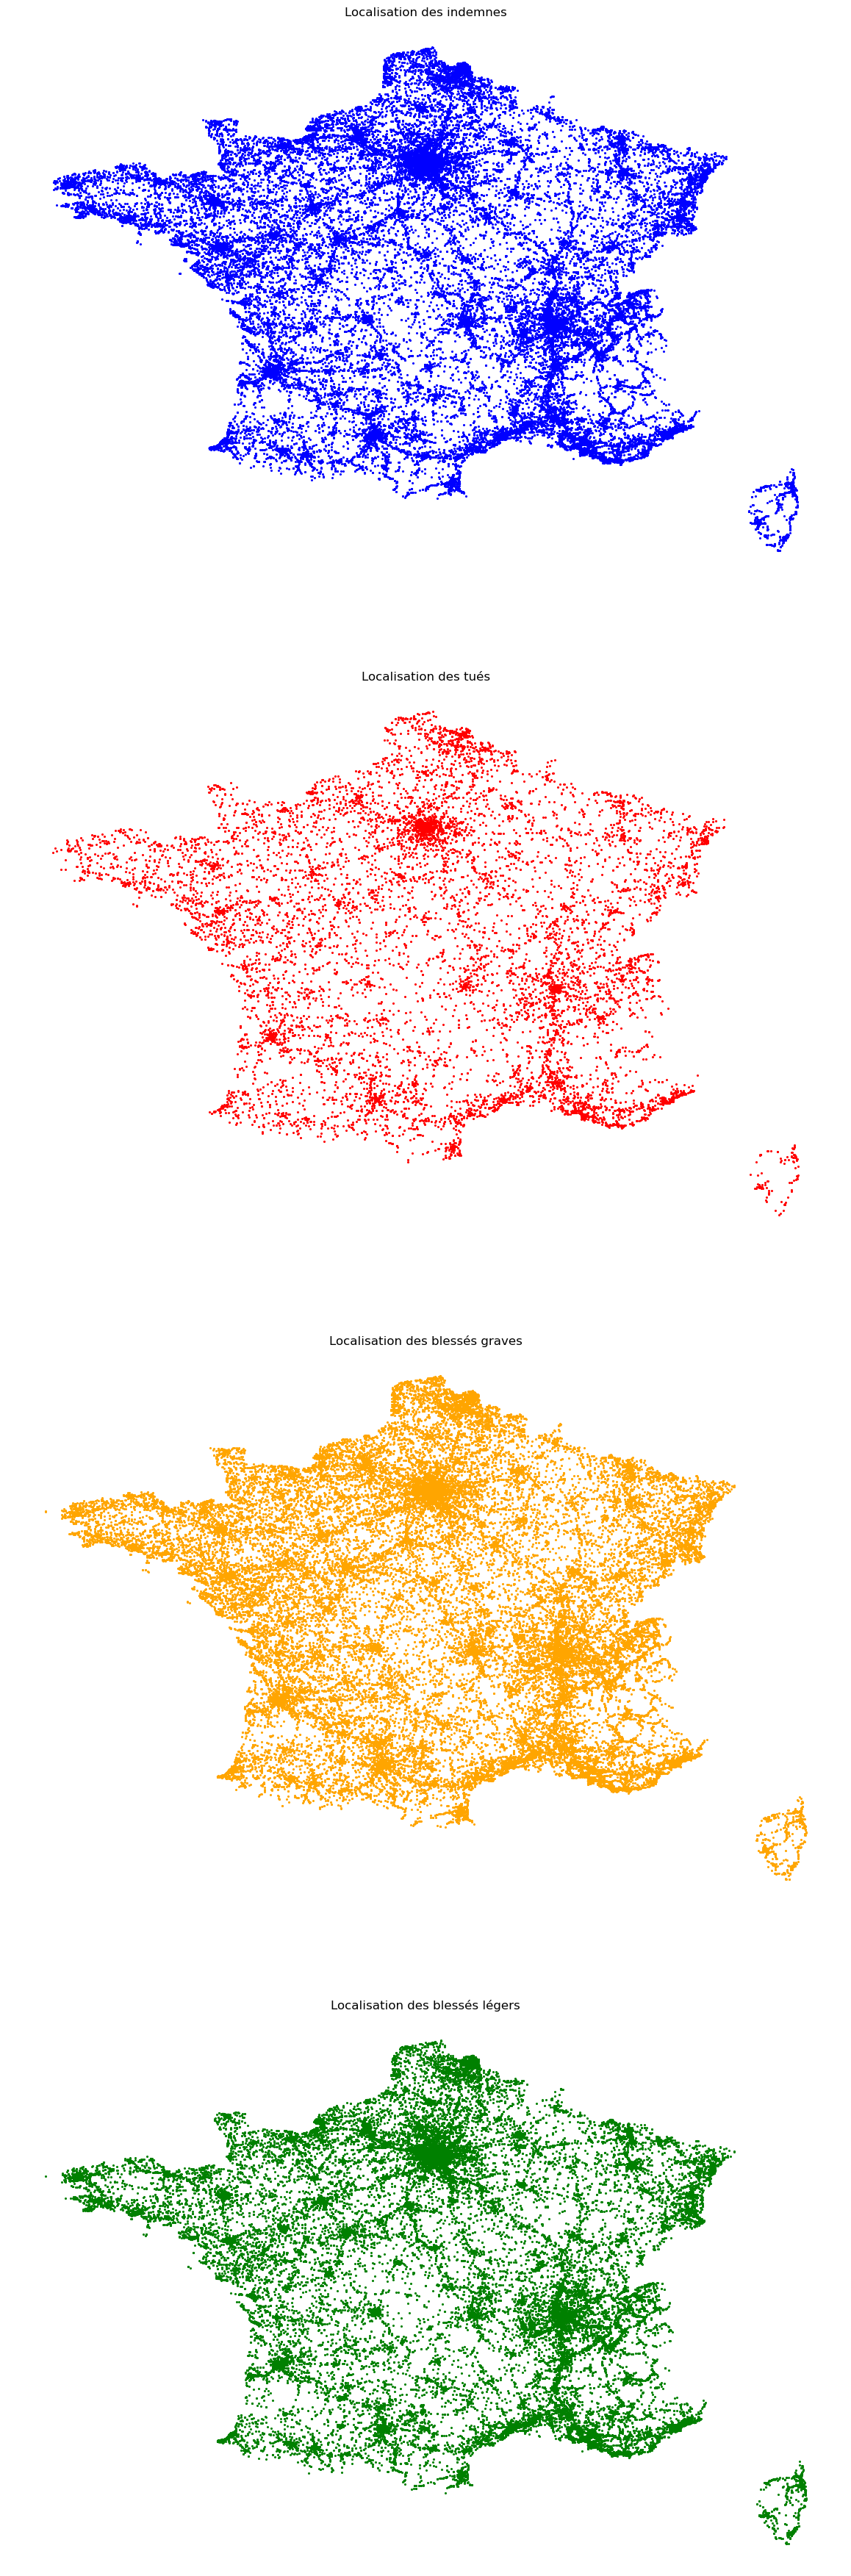

In [ ]:
# Créer une figure et des axes pour la carte
figure, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(4, 1, figsize = (15, 45))

# Masquer les axes pour une apparence plus propre
plt.axis('off')

# Tracer les accidents sur la carte en utilisant différentes couleurs pour chaque gravité
colors = ['blue', 'red', 'orange', 'green']
labels = ['indemnes', 'tués', 'blessés graves', 'blessés légers']
axs = [ax_1, ax_2, ax_3, ax_4]
titles = ['Localisations des indemnes', 'Localisations des tués','Localisations des blessés graves', 'Localisations des blessés légers']
for i in range(4):
    plt.subplot(4, 1, i+1)
    geo_df[geo_df['grav'] == i+1].plot(ax = axs[i], markersize = 1.5, color = colors[i], label = labels[i])
    plt.title('Localisation des {}'.format(labels[i]))
    plt.axis('off')
plt.show()